In [15]:
import scipy
import matplotlib.pyplot as plt   # MATLAB plotting functions
from control.matlab import *  # MATLAB-like functions
import numpy as np
from math import *

In [16]:
# Motor Parameters
PolePairs = 2
flux = 0.00125    # Wb
J = 5e-6          # N-m-s^2 / rad
B = 2.5e-6        # N-m-s / rad

Kt = 3/2*PolePairs *flux

In [17]:
s = tf('s')

In [18]:
# Motor Mechanical Model
Gs = tf(Kt, [J, B])

print(Gs)


     0.00375
-----------------
5e-06 s + 2.5e-06



In [19]:
# PI Controller
Kp = 0.001
Ki = 0.001
Cs = Kp + Ki/s

In [20]:
# Open loop transfer function
Gop = Cs * Gs
print(Gop)



3.75e-06 s + 3.75e-06
---------------------
5e-06 s^2 + 2.5e-06 s



In [21]:
# Calculate open loop poles
p = pole(Gop)

print(p)

[-0.5  0. ]


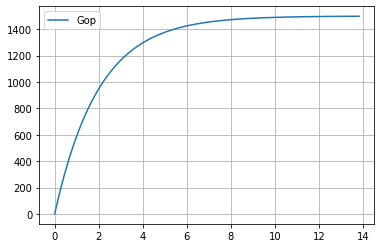

In [22]:
# Open loop step response
yout, T = step(Gs)
plt.plot(T.T, yout.T, label="Gop")

plt.grid()
plt.legend()

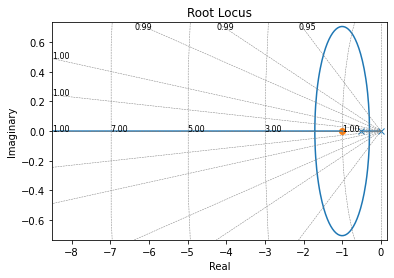

In [23]:
# Plot root locus of the open loop transfer function
a = rlocus(Gop)

In [24]:
# Close loop transfer function
Gcl = feedback(Gop, 1)

print(Gcl)


      3.75e-06 s + 3.75e-06
---------------------------------
5e-06 s^2 + 6.25e-06 s + 3.75e-06



In [25]:
p = pole(Gcl)

print(p)

[-0.625+0.59947894j -0.625-0.59947894j]


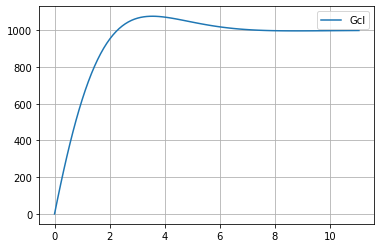

In [26]:
# Plot close loop speed control step response
target = 1000
yout, T = step(Gcl * target)
plt.plot(T.T, yout.T, label="Gcl")

plt.grid()
plt.legend()

In [27]:
Yc = Cs / (1+Cs*Gs)

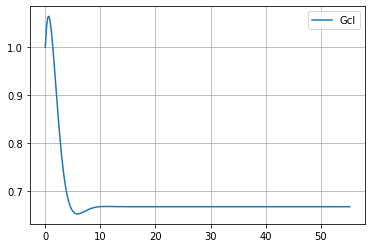

In [28]:
yout, T = step(Yc * target)
plt.plot(T.T, yout.T, label="Gcl")

plt.grid()
plt.legend()